In [ ]:
from scipy import io
test_path = "/content/drive/MyDrive/Colab Notebooks/test_32x32.mat"
train_path = "/content/drive/MyDrive/Colab Notebooks/train_32x32.mat"
# data = io.loadmat(train_path)
# print("aaa {}".format(type(data)))
# print("bbbb {}".format(data.keys()))
trX = io.loadmat(train_path)["X"]
trY = io.loadmat(train_path)["y"]
tsX = io.loadmat(test_path)["X"]
tsY = io.loadmat(test_path)["y"]

# Normalize training data
trX = trX/255
tsX = tsX/255
print(type(trX))

<class 'numpy.ndarray'>


# New Section

In [ ]:
# OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
 
encoder = OneHotEncoder().fit(trY.reshape(-1, 1))

y_train = encoder.transform(trY.reshape(-1, 1)).toarray()
y_test = encoder.transform(tsY.reshape(-1, 1)).toarray()

In [ ]:
print(trX.shape)
print(tsX.shape)
print(y_train.shape)
print(y_test.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)
(73257, 10)
(26032, 10)


In [ ]:
from tensorflow.keras import layers, models, optimizers
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu', padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(3072, activation='relu'))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
optimization = optimizers.SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimization, metrics=["accuracy"])
# print("trx: {}".format(trX))
# print("try: {}".format(trY))
# print("tsx: {}".format(tsX))
# print("tsy: {}".format(tsY))
history = model.fit(trX, y_train, batch_size=20, epochs = 10, validation_data = (tsX, y_test))

Epoch 1/10
3663/3663 [==============================] - 1496s 408ms/step - loss: 1.4824 - accuracy: 0.4947 - val_loss: 0.5914 - val_accuracy: 0.8357
Epoch 2/10
3663/3663 [==============================] - 1476s 403ms/step - loss: 0.4809 - accuracy: 0.8594 - val_loss: 0.4380 - val_accuracy: 0.8728
Epoch 3/10
3663/3663 [==============================] - 1474s 402ms/step - loss: 0.3502 - accuracy: 0.8977 - val_loss: 0.3823 - val_accuracy: 0.8869
Epoch 4/10
2544/3663 [===================>..........] - ETA: 6:59 - loss: 0.2795 - accuracy: 0.9180

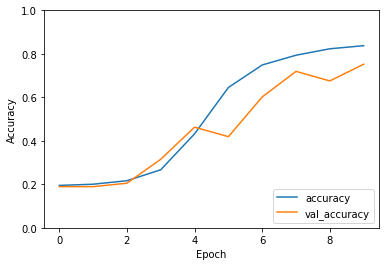

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


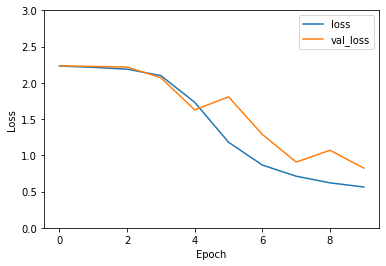

In [ ]:
import matplotlib.pyplot as plt1
plt1.plot(history.history['loss'], label='loss')
plt1.plot(history.history['val_loss'], label = 'val_loss')
plt1.xlabel('Epoch')
plt1.ylabel('Loss')
plt1.ylim([0, 3])
plt1.legend()

In [ ]:
print(history.history)

{'loss': [2.231579303741455, 2.2138311862945557, 2.1889688968658447, 2.0994696617126465, 1.7320966720581055, 1.1808862686157227, 0.8653031587600708, 0.7120442986488342, 0.6203528046607971, 0.562843382358551], 'accuracy': [0.19491395354270935, 0.20044560730457306, 0.21650277078151703, 0.2668638527393341, 0.43219882249832153, 0.6452827453613281, 0.748885989189148, 0.7937538623809814, 0.8232944011688232, 0.8375461101531982], 'val_loss': [2.2341275215148926, 2.2269632816314697, 2.2181873321533203, 2.0704469680786133, 1.6271274089813232, 1.8062776327133179, 1.2885593175888062, 0.9065491557121277, 1.0695183277130127, 0.8237404227256775], 'val_accuracy': [0.18921059370040894, 0.1892651915550232, 0.20501795411109924, 0.31519171595573425, 0.4628909230232239, 0.41903162002563477, 0.601744532585144, 0.7194125056266785, 0.6755259037017822, 0.7522966861724854]}


# New Section